In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
data = pd.read_csv("climate_change_indicators.csv")
data

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [18]:
# Step 2: Data Preprocessing
# Select relevant columns (ObjectId, Country, yearly temperature data)
columns_to_use = ['ObjectId', 'Country', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']
data = data[columns_to_use]

In [19]:
# Handle missing values by filling with column means
data = data.replace('...', np.nan).astype(float, errors='ignore')
data = data.fillna(data.mean())

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_7420\1478032327.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [20]:
label_encoder = LabelEncoder()
data['Country_encoded'] = label_encoder.fit_transform(data['Country'])

# Select features for clustering (yearly temperature data only)
X = data[['F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']]

In [21]:

# Step 3: Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Step 4: Outlier Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_scaled)

In [23]:
# Mark the outliers (1: normal, -1: outlier)
data['Outlier'] = np.where(outliers == -1, 1, 0)

In [24]:
# Step 5: Model Selection - K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Hxtreme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hxtreme\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


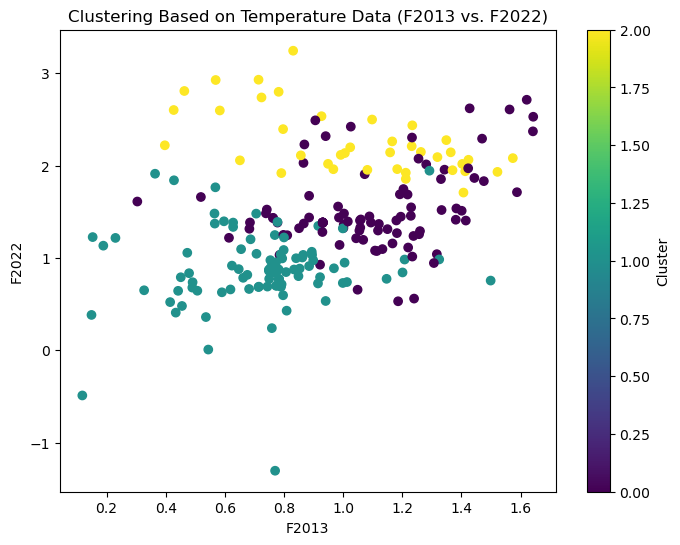

In [25]:
# Step 6: Visualization of Data - Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['F2013'], data['F2022'], c=data['Cluster'], cmap='viridis')
plt.title('Clustering Based on Temperature Data (F2013 vs. F2022)')
plt.xlabel('F2013')
plt.ylabel('F2022')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
# Step 7: Performance Metrics
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score}")

db_score = davies_bouldin_score(X_scaled, data['Cluster'])
print(f"Davies-Bouldin Score: {db_score}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.25914665058789277
Davies-Bouldin Score: 1.2550428646130938
Inertia: 1065.8969423216802


In [28]:
# Step 8: Cluster Analysis
# Group by cluster and calculate the mean of the features
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

           ObjectId     F2013     F2014     F2015     F2016     F2017  \
Cluster                                                                 
0        114.212766  1.089285  1.055514  1.297489  1.562540  1.384296   
1        115.684783  0.724891  0.783565  0.956946  1.132506  1.028215   
2        103.743590  1.036846  2.039154  1.940923  1.867256  1.627103   

            F2018     F2019     F2020     F2021     F2022  Country_encoded  \
Cluster                                                                      
0        1.328886  1.489528  1.585154  1.571488  1.515981       113.361702   
1        0.875295  1.116577  1.122467  0.977093  0.876132       114.586957   
2        2.244436  2.101231  2.485564  1.658513  2.253051       102.615385   

          Outlier  
Cluster            
0        0.031915  
1        0.065217  
2        0.076923  


C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_7420\2812040287.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data.groupby('Cluster').mean()
